## Importing Libraries

In [2]:
pip install google-play-scraper

  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.2-py3-none-any.whl size=24386 sha256=6e0989f4df88c636bb0986513fa6c68664543b7578ec19329caf4f665f5ec3e3
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\cf\c0\07\c3bb86c16cb190a07afd5d77c7e537d61f61f0c14783dc50f2
Successfully built google-play-scraper
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [4]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

In [5]:
app_infos = []
for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:33<00:00,  2.24s/it]


In [13]:
len(app_infos[0])

51

In [27]:
app_infos[0].keys()

dict_keys(['title', 'description', 'descriptionHTML', 'summary', 'summaryHTML', 'installs', 'minInstalls', 'score', 'ratings', 'reviews', 'histogram', 'price', 'free', 'currency', 'sale', 'saleTime', 'originalPrice', 'saleText', 'offersIAP', 'inAppProductPrice', 'size', 'androidVersion', 'androidVersionText', 'developer', 'developerId', 'developerEmail', 'developerWebsite', 'developerAddress', 'privacyPolicy', 'developerInternalID', 'genre', 'genreId', 'icon', 'headerImage', 'screenshots', 'video', 'videoImage', 'contentRating', 'contentRatingDescription', 'adSupported', 'containsAds', 'released', 'updated', 'version', 'recentChanges', 'recentChangesHTML', 'editorsChoice', 'similarApps', 'moreByDeveloper', 'appId', 'url'])

In [29]:
def print_json(json_object):
    json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str)
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [30]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support

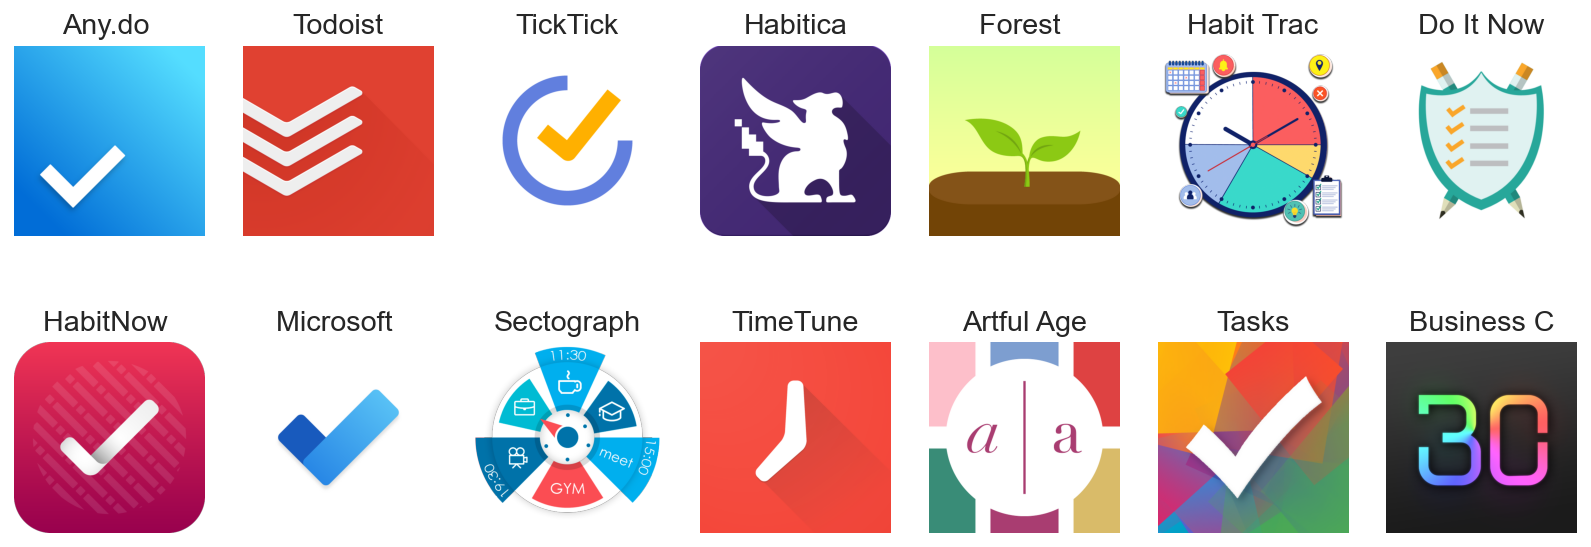

In [31]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))
for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [32]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

## Scraping App Reviews

In [33]:
app_reviews = []
for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
            ap,
            lang='en',
            country='us',
            sort=sort_order,
            count= 200 if score == 3 else 100,
            filter_score_with=score
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [04:01<00:00, 16.13s/it]


In [41]:
app_reviews[0].keys()

dict_keys(['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'appId'])

In [42]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [44]:
app_reviews_df.score.value_counts()

3    5363
5    3000
4    2922
1    2904
2    2684
Name: score, dtype: int64